In [1]:
!pwd

/Users/alexkim/cakd7_Alex/m6_머신러닝 알고리즘 이해 및 활용


### [과제]_0913_6
tdf 를 전처리 및 탐색적 분석(시각화, 통계적 기법)을 통하여 분석용 데이터셋으로 만드세요

In [382]:
import pandas as pd
tdf = pd.read_csv('titanic_train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [383]:
# 그룹핑
agg_format = {'Age':'max','SibSp':'sum','Fare':'mean','Survived':'mean'}
tdf.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare,Survived
Pclass,,,,
1,80.0,90,84.154687,0.629630
2,70.0,74,20.662183,0.472826
3,74.0,302,13.675550,0.242363


In [384]:
# 결손 데이터 확인
tdf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [385]:
# # 결측치 처리
# tdf['Age'] = tdf['Age'].fillna(tdf['Age'].mean())
# # 최빈값으로 처리
# tdf['Cabin'] = tdf['Cabin'].fillna(tdf['Cabin'].mode()[0])
# tdf['Embarked'] = tdf['Embarked'].fillna(tdf['Embarked'].mode()[0]) 
# tdf.isna().sum()

In [386]:
# apply lambda 연습
def age_category(age):
    cat=''
    if age<=5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <=18: cat = 'Teenager'
    elif age <=25: cat = 'Student'
    elif age <=35: cat = 'Young Adult'
    elif age <=60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat
tdf['Age_cat'] = tdf['Age'].apply(lambda x : age_category(x))
display(tdf['Age_cat'].value_counts())
display(tdf[['Age','Age_cat']].head())

Elderly        199
Young Adult    196
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Name: Age_cat, dtype: int64

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [387]:
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


#### 시각화

#### 생존 여부(Survived)에 따른 연령(Age) 분포

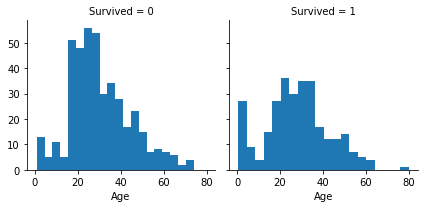

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt
g= sns.FacetGrid(tdf, col='Survived') # 열을 생존 여부로 나눔
g.map(plt.hist, 'Age', bins=20) # g라는 객체를 만들어 히스토그램으로 시각화

#### 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포

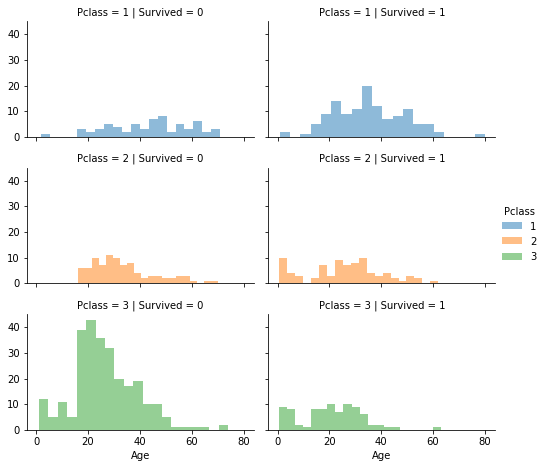

In [389]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue="Survived")
# 열은 생존 여부, 행과 색깔을 객실 등급으로 나눔
grid= sns.FacetGrid(tdf, col='Survived', row='Pclass',hue='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20, alpha=.5)
grid.add_legend() # 범례 추가

#### 객실 등급(Pclass)과 성별(Sex) 시각화



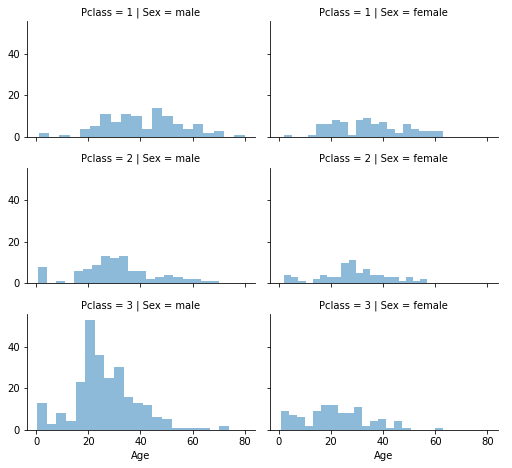

In [390]:
grid = sns.FacetGrid(tdf, row='Pclass', col='Sex', height=2.2, aspect=1.6)
# Pclass, Sex, Age와의 결합이 2열 3행으로 구성됨
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

#### 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)

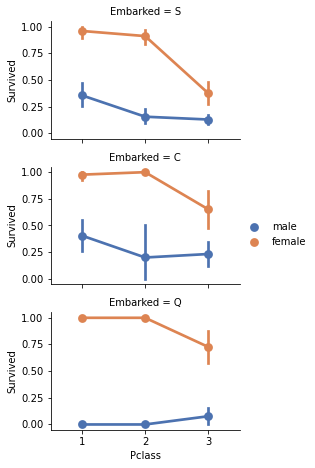

In [391]:
# grid = sns.FacetGrid(train_df, col="Embarked")
grid= sns.FacetGrid(tdf, row="Embarked", height=2.2, aspect=1.6)
# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

#### 승선지(Embarked), 생존 여부(Survived), 성별(Sex)에 따른 요금(Fare)

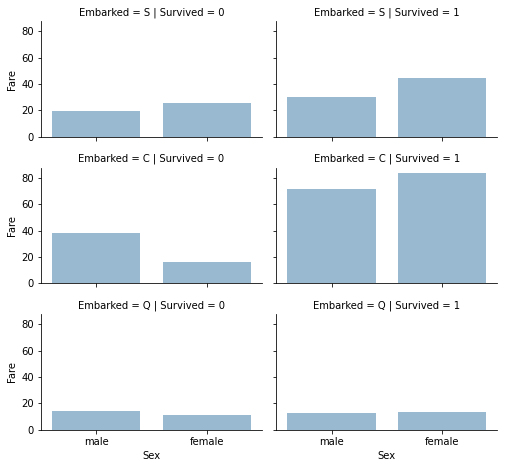

In [392]:
# grid = sns.FacetGrid(train_df, col="Embarked", hue="Survived", pallet={0: 'k', 1:'w'})
# correlate categorical features and numeric features.
grid= sns.FacetGrid(tdf, row='Embarked', col='Survived',height=2.2, aspect=1.6)
# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함

grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

grid.add_legend()

분석_3
 
 - Age<=4일 때 생존확률이 높음.
 - 15-25세가 가장 많이 사망함.
 - 대부분의 탑승객은 15-35세인 것으로 확인됨.
 - Pclass=3인 탑승객이 가장 많았지만 사망한 사람의 수도 가장 많음.
 - Pclass=2인 승객 중 유아는 대부분 생존함.
 - Pclass=1인 탑승객의 생존확률이 상대적으로 높음.
 - 여성일 경우 생존확률이 더 높은 것을 확인할 수 있음. 다만, Embarked=C일 때, 
   남성의 생존확률이 더욱 더 높음.
 - 승선지가 S 또는 C인 경우, 생존한 승객들의 평균 요금이 비교적 높음.
 
   

#### 데이터 전처리

#### 안 쓸 변수(Ticket, Cabin) 제거

In [393]:
print("Before", tdf.shape)

#열(axis=1 기준) 제거
tdf = tdf.drop(["Ticket", "Cabin"], axis=1)

print("After", tdf.shape)

Before (891, 13)
After (891, 11)


In [394]:
tdf['Title'] = tdf.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(tdf['Title'],tdf['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


 - female에서는 Miss와 Mrs가, male에서는 Master와 Mr가 두드러지게 나타남
   (Mlle와 Ms 는 Miss의, Ms는 Mrs의 불어식 표현)
 - 나머지는 Rare로 분류

In [395]:
tdf['Title'] = tdf['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Jonkheer','Major','Rev', 'Sir', 'Dona'], 'Rare')

tdf['Title']= tdf['Title'].replace('Mlle','Miss')
tdf['Title']= tdf['Title'].replace('Ms','Miss')
tdf['Title']= tdf['Title'].replace('Mme','Mrs')
    
tdf[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


#### Title 변수를 숫자형 변수로 바꿔주기

In [396]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

tdf['Title']= tdf['Title'].map(title_mapping)
tdf['Title']= tdf['Title'].fillna(0)
    
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


#### 안 쓸 변수(Name, Passengerld) 제거

In [397]:
tdf = tdf.drop(['Name', 'PassengerId'], axis=1)

tdf.shape

(891, 10)

#### 성별(sex) 변수를 숫자 범주형 변수로 변환

In [398]:
tdf['Sex'] = tdf['Sex'].map({'female':1, 'male':0}).astype(int)
    
tdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat,Title
0,0,3,0,22.0,1,0,7.2500,S,Student,1
1,1,1,1,38.0,1,0,71.2833,C,Adult,3
2,1,3,1,26.0,0,0,7.9250,S,Young Adult,2
3,1,1,1,35.0,1,0,53.1000,S,Young Adult,3
4,0,3,0,35.0,0,0,8.0500,S,Young Adult,1


In [399]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [400]:
# sex, Pclass에 따른 Age 중간값으로 결측치 채우기
for i in range(0, 2): # median 값을 구하기 위해 빈칸을 없앰.
    for j in range(0, 3):
        guess_df = tdf[(tdf['Sex'] == i) & \
                              (tdf['Pclass'] == j+1)]['Age'].dropna()
        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.median() # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for i in range(0, 2): ## 빈칸에 나이 집어넣음
    for j in range(0, 3):
        tdf.loc[ (tdf.Age.isnull()) & (tdf.Sex == i) & (tdf.Pclass == j+1),\
                'Age'] = guess_ages[i,j]

tdf['Age'] = tdf['Age'].astype(int)

tdf.head() 
tdf.isnull().sum() # Age의 결측치가 채워짐.

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Age_cat     0
Title       0
dtype: int64

In [401]:
guess_ages

array([[40. , 30. , 25. ],
       [35. , 28. , 21.5]])

#### 연령(Age) 변수를 범주형 변수로 변환



In [402]:
# 임의로 5개 그룹을 지정
# cut이라는 method 이용하면 구간별로 나눌 수 있음
tdf['AgeBand']=pd.cut(tdf['Age'],5) 
tdf[['AgeBand', 'Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


#### AgeBand를 바탕으로 Age를 범주형 변수로 바꿔준 후, AgeBand변수는 제거


In [403]:

tdf.loc[ tdf['Age'] <= 16, 'Age'] = 0
tdf.loc[(tdf['Age'] > 16) & (tdf['Age'] <= 32), 'Age'] = 1
tdf.loc[(tdf['Age'] > 32) & (tdf['Age'] <= 48), 'Age'] = 2
tdf.loc[(tdf['Age'] > 48) & (tdf['Age'] <= 64), 'Age'] = 3
tdf.loc[ tdf['Age'] > 64, 'Age'] = 4
tdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,Student,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,Adult,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,Young Adult,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,Young Adult,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,Young Adult,1,"(32.0, 48.0]"


In [404]:
tdf['Age'].unique()

array([1, 2, 3, 0, 4])

In [405]:
tdf=tdf.drop(['AgeBand'], axis=1)
tdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat,Title
0,0,3,0,1,1,0,7.2500,S,Student,1
1,1,1,1,2,1,0,71.2833,C,Adult,3
2,1,3,1,1,0,0,7.9250,S,Young Adult,2
3,1,1,1,2,1,0,53.1000,S,Young Adult,3
4,0,3,0,2,0,0,8.0500,S,Young Adult,1


#### SibSp와 Parch를 가족과의 동반여부를 알 수 있는 새로운 변수로 통합


In [406]:
tdf['FamilySize'] = tdf['SibSp'] + tdf['Parch'] + 1
    
tdf[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [407]:
tdf['IsAlone']=0
tdf.loc[tdf['FamilySize']==1, 'IsAlone'] = 1
    
tdf[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [408]:
tdf = tdf.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
tdf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_cat,Title,IsAlone
0,0,3,0,1,7.2500,S,Student,1,0
1,1,1,1,2,71.2833,C,Adult,3,0
2,1,3,1,1,7.9250,S,Young Adult,2,1
3,1,1,1,2,53.1000,S,Young Adult,3,0
4,0,3,0,2,8.0500,S,Young Adult,1,1


#### Age 변수와 Pclass를 곱한 Age*class 변수 생성


In [409]:
# 나이하고 좌석등급하고 합침
tdf['Age*Class'] = tdf.Age * tdf.Pclass

tdf.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10) ##loc첫번째 인수?는 열이름, 두번째 인수는 행이름(들)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### 승선지(Ebmarked) 변수를 최빈값으로 대체


In [410]:
freq_port = tdf.Embarked.dropna().mode()[0]
freq_port

'S'

In [411]:
# 빈 값 2개는 최빈값인 S로 채운다음 승선지별 생존률을 구함
tdf['Embarked'] = tdf['Embarked'].fillna(freq_port)
    
tdf[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### 승선지(Ebmarked) 변수를 범주형 변수로 대체


In [412]:
#승선지 값을 숫자 카테고리로 바꾸고 타입도 object에서 메모리 적게먹는 int로 바꿈
tdf['Embarked'] = tdf['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

tdf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_cat,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,Student,1,0,3
1,1,1,1,2,71.2833,1,Adult,3,0,2
2,1,3,1,1,7.9250,0,Young Adult,2,1,3
3,1,1,1,2,53.1000,0,Young Adult,3,0,2
4,0,3,0,2,8.0500,0,Young Adult,1,1,6


#### 요금(Fare) 변수를 중앙값으로 대체


In [413]:
tdf['Fare'].fillna(tdf['Fare'].dropna().median(), inplace=True)
tdf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_cat,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,Student,1,0,3
1,1,1,1,2,71.2833,1,Adult,3,0,2
2,1,3,1,1,7.9250,0,Young Adult,2,1,3
3,1,1,1,2,53.1000,0,Young Adult,3,0,2
4,0,3,0,2,8.0500,0,Young Adult,1,1,6


#### 요금(Fare)을 숫자 범주형 변수로 변환


In [414]:
tdf['FareBand'] = pd.qcut(tdf['Fare'], 4)
tdf[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [415]:

tdf.loc[ tdf['Fare'] <= 7.91, 'Fare'] = 0
tdf.loc[(tdf['Fare'] > 7.91) & (tdf['Fare'] <= 14.454), 'Fare'] = 1
tdf.loc[(tdf['Fare'] > 14.454) & (tdf['Fare'] <= 31), 'Fare']   = 2
tdf.loc[ tdf['Fare'] > 31, 'Fare'] = 3
tdf['Fare'] = tdf['Fare'].astype(int)

tdf = tdf.drop(['FareBand'], axis=1)
    
tdf.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_cat,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,Student,1,0,3
1,1,1,1,2,3,1,Adult,3,0,2
2,1,3,1,1,1,0,Young Adult,2,1,3
3,1,1,1,2,3,0,Young Adult,3,0,2
4,0,3,0,2,1,0,Young Adult,1,1,6
5,0,3,0,1,1,2,Elderly,1,1,3
6,0,1,0,3,3,0,Adult,1,1,3
7,0,3,0,0,2,0,Baby,4,0,0
8,1,3,1,1,1,0,Young Adult,3,0,3
9,1,2,1,0,2,1,Teenager,3,0,0


In [416]:
tdf = tdf.drop(['Age_cat'], axis=1)
tdf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


#### 생존율 예측

In [434]:
# 예측에 쓰일 데이터: tdf_info / 생존율 데이터: tdf_target
tdf_info=tdf.drop(columns='Survived')
tdf_target=tdf['Survived']

In [435]:
# 학습용, 평가용 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(tdf_info,tdf_target,test_size=0.2,random_state=11)
X_train.shape,X_test.shape

((712, 8), (179, 8))

In [436]:
# DecisionTreeClassifier 객체 형성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [437]:
# 학습이 완료된 결정트리 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [438]:
from sklearn.metrics import accuracy_score
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.8547
